In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pickle
import joblib
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score, mean_absolute_error, mean_squared_error
from sklearn import preprocessing
from sklearn.cluster import HDBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('vehiculos-de-segunda-mano-sample.csv')
df_provincia = pd.read_csv('Coches010923Completo.csv')

## EDA

### Echamos un vistazo a nuestro dataframe

In [3]:
df.head()

,vehicle_type,make,model,version,fuel,year,kms,power,doors,shift,...,dealer_name,dealer_description,dealer_address,dealer_zip_code,dealer_city,dealer_country_code,dealer_is_professional,dealer_website,dealer_registered_at,date
0,car,Opel,Crossland,1.2 GAS 110 GS Line 5p S/S,Gasolina,2022,5.0,110.0,NaN,manual,...,Sergio Y.,NaN,"2, Carrer de Jacint Benavente, Poblenou, Pined...",8397.0,Pineda de Mar,ES,True,www.cocheauto.com,2017-01-18,2023-02-06
1,car,Opel,Crossland,1.2 81kW (110CV) GS Line,Gasolina,2022,24847.0,110.0,NaN,manual,...,Peugeot Alcala 534,Concesionario Oficial Peugeot Alcalá 534. Disp...,"Avenida de José Gárate, Coslada, Área metropol...",28823.0,Coslada,ES,True,www.alcala534.com/es/vehiculos-ocasion,2019-02-15,2023-02-06
2,car,Opel,Crossland,1.5D 88kW (120CV) Business Elegance Auto,Diésel,2021,41356.0,120.0,NaN,automatic,...,Clicars S.,Nº1 en Europa en venta de coches online. \nYa ...,"San Cristóbal, Avenida de Andalucía, San Crist...",28021.0,Madrid,ES,True,www.clicars.com/,2016-05-09,2023-02-06
3,car,Opel,Crossland,GS-Line 1.2 GAS MT6 S/S 110cv,Gasolina,2022,11.0,110.0,NaN,manual,...,Vallescar S.,"¿QUIERES UN VEHÍCULO HECHO A TU MEDIDA, CON LA...","Parc de Bombers de Sabadell, 52, Carretera de ...",8200.0,Sabadell,ES,True,https://www.vallescarocasion.es/,2019-09-30,2023-02-06
4,car,Opel,Crossland,GS-Line 1.2 GAS MT6 S/S 110cv,Gasolina,2022,11.0,110.0,NaN,manual,...,Vallescar Ocasion M.,"¿QUIERES UN VEHÍCULO HECHO A TU MEDIDA, CON LA...","27, Carrer de Fèlix Ferran, Mollet del Vallès,...",8100.0,Mollet del Vallès,ES,True,https://www.vallescarocasion.es/,2017-04-19,2023-02-06


Obtenemos el numero de valores únicos por cada columna

In [4]:
df.nunique()

vehicle_type                 1
make                        66
model                      748
version                   8658
fuel                         4
year                        43
kms                       6643
power                      349
doors                        0
shift                        2
color                        0
photos                      10
description               6439
price                     2665
currency                     1
location                   669
publish_date               424
update_date                 38
dealer_name               1678
dealer_description        1181
dealer_address            1675
dealer_zip_code            872
dealer_city                665
dealer_country_code          1
dealer_is_professional       1
dealer_website             888
dealer_registered_at      1177
date                        13
dtype: int64

Obtenemos la suma del numero de valores nulos por cada columna

In [5]:
df.isna().sum()

vehicle_type                   0
make                           0
model                          0
version                      158
fuel                        3190
year                           0
kms                          811
power                        291
doors                     100000
shift                       1018
color                     100000
photos                         0
description                44190
price                          0
currency                       0
location                       0
publish_date                   0
update_date                    0
dealer_name                   92
dealer_description         18442
dealer_address                92
dealer_zip_code               92
dealer_city                   92
dealer_country_code            0
dealer_is_professional         0
dealer_website             20087
dealer_registered_at          92
date                           0
dtype: int64

Inspeccionamos las columnas de localidades y provincias

In [6]:
df_provincia.head()

,make,model,fuel,kms,power,shift,price,location,codigopostalid,provincia,poblacion
0,Opel,Crossland,Gasolina,5.0,110.0,manual,22900,Pineda de Mar,8397,Barcelona,Pineda de Mar
1,Opel,Crossland,Gasolina,24847.0,110.0,manual,19990,Coslada,28823,Madrid,Coslada
2,Opel,Crossland,Diésel,41356.0,120.0,automatic,18590,Madrid,28021,Madrid,Madrid
3,Opel,Crossland,Gasolina,11.0,110.0,manual,22700,Sabadell,8201,Barcelona,Sabadell
4,Opel,Crossland,Gasolina,11.0,110.0,manual,22700,Mollet del Vallès,8100,Barcelona,Mollet del Vallès


In [7]:
df.location.value_counts()

Madrid                                 5135
Barcelona                              4488
Vigo                                   3519
Sevilla                                3411
Murcia                                 3358
                                       ... 
Baeza                                     1
Foz                                       1
Residencia Nuestra Señora del Pilar       1
Orio                                      1
El Saucejo                                1
Name: location, Length: 669, dtype: int64

Conclusion tras ver duplicados, nulos, etc, quitamos las siguientes columnas:

In [8]:
df = df.drop(['vehicle_type','dealer_country_code','dealer_is_professional','color','description','currency','dealer_zip_code','dealer_address','doors','dealer_description','update_date','dealer_registered_at','date','version','dealer_website','photos','dealer_name','dealer_city','publish_date'], axis = 1)

Ahora quitamos duplicados:

In [9]:
df.shape

(100000, 9)

In [10]:
df = df.drop_duplicates()

Descubrimos que prácticamente la mitad de nuestro dataframe son duplicados:

In [11]:
df.shape

(41764, 9)

Quitamos los nulos

In [12]:
df = df.dropna()
df.shape

(39648, 9)

Unimos los dos Data Frame

In [13]:
loc2cp = df_provincia[['location','codigopostalid']].set_index('location').to_dict()['codigopostalid']
loc2provincia = df_provincia[['location','provincia']].set_index('location').to_dict()['provincia']

In [14]:
df['cp'] = df.location.map(loc2cp)
df['provincia'] = df.location.map(loc2provincia)

In [15]:
df['provincia'].isna().sum()

1452

In [16]:
df.isna().sum()

make            0
model           0
fuel            0
year            0
kms             0
power           0
shift           0
price           0
location        0
cp           1452
provincia    1452
dtype: int64

Volvemos a quitar duplicados y vemos la forma final

In [17]:
df = df.dropna()
df.shape

(38196, 11)

Creamos columna antiguedad

In [18]:
df['antiguedad'] = (2023 - df['year'])
df = df.drop(['year'], axis = 1)
df

,make,model,fuel,kms,power,shift,price,location,cp,provincia,antiguedad
0,Opel,Crossland,Gasolina,5.0,110.0,manual,22900,Pineda de Mar,8397.0,Barcelona,1
1,Opel,Crossland,Gasolina,24847.0,110.0,manual,19990,Coslada,28823.0,Madrid,1
2,Opel,Crossland,Diésel,41356.0,120.0,automatic,18590,Madrid,28014.0,Madrid,2
3,Opel,Crossland,Gasolina,11.0,110.0,manual,22700,Sabadell,8203.0,Barcelona,1
4,Opel,Crossland,Gasolina,11.0,110.0,manual,22700,Mollet del Vallès,8100.0,Barcelona,1
...,...,...,...,...,...,...,...,...,...,...,...
99990,Citroen,C4 Picasso,Diésel,148527.0,150.0,manual,13310,Granollers,8403.0,Barcelona,8
99992,Citroen,C4 Picasso,Diésel,148527.0,150.0,manual,13310,Estepona,29680.0,Málaga,8
99994,Citroen,C4 Picasso,Diésel,148527.0,150.0,manual,13310,Saladar,3700.0,Alicante,8
99996,Citroen,C4 Picasso,Diésel,173035.0,111.0,automatic,9290,Valencia,46002.0,Valencia,10


Hacemos un plot mostrando las distintas features

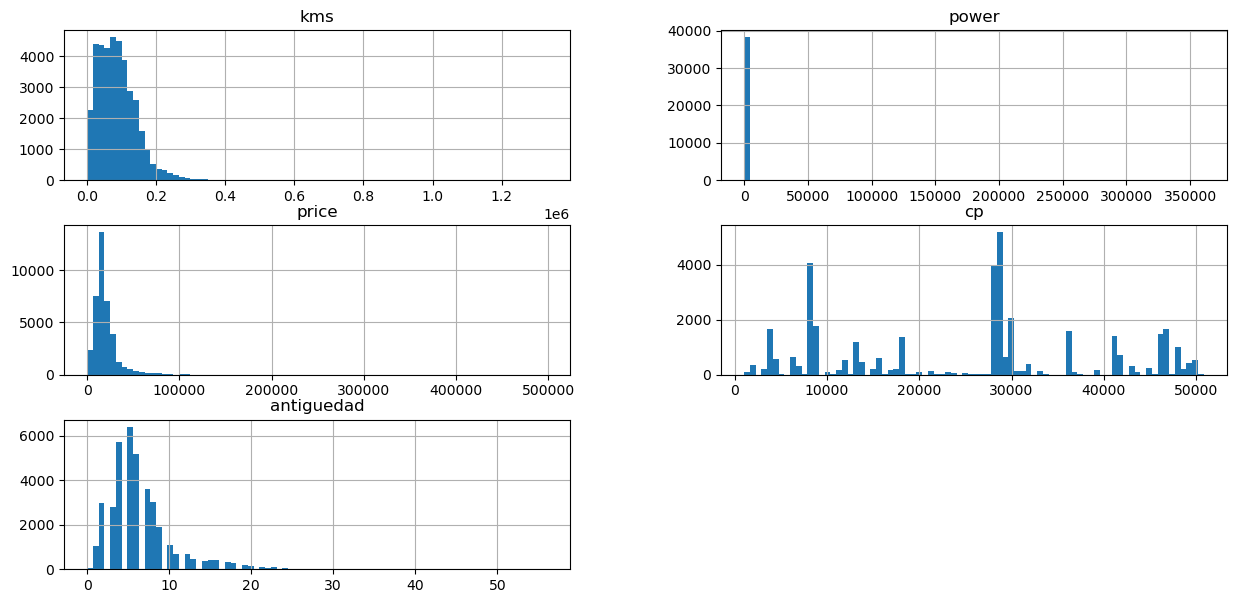

In [19]:
df.hist(figsize=(15, 7), bins=80)
plt.show()

#### Examinamos la distribución de datos precio 

Text(0.5, 0, 'Precio en escala logaritmica')

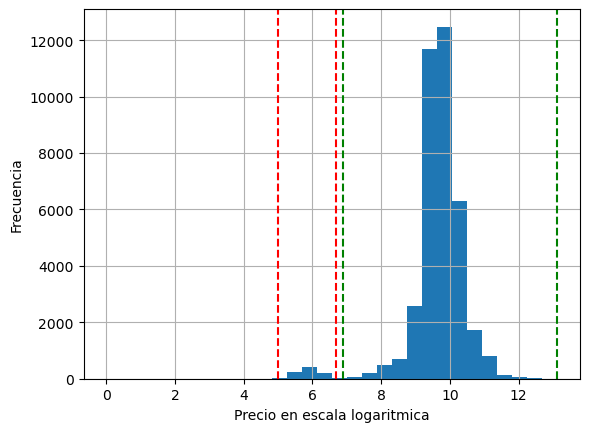

In [20]:
np.log(df.price + 1).hist(bins = 30)
plt.axvline(x=6.9, color='g', linestyle='--')
plt.axvline(x=13.12, color='g', linestyle='--')
plt.axvline(x=6.7, color='r', linestyle='--')
plt.axvline(x=5, color='r', linestyle='--')
plt.ylabel('Frecuencia')
plt.xlabel('Precio en escala logaritmica')

Al realizar la distribución logarítmica del precio descubrimos dos agrupaciones en nuestra distribución, gracias a nuestro análisis anterior sabemos que la agrupacion de la izquierda es consecuencia de precios inusualmente bajos en relación al precio de venta de un coche de segunda mano habitual, concluimos que los coches dentro de este ranfgo de precio se destinan a la venta para piezas y desguace. Por ello encontramos pertinente aislarla del conjunto de datos usado en el análisis. 

Los puntos que usamos para separar estas agrupaciones coinciden los límites de la agrupación, con un valor de:

In [21]:
print(f'({np.exp(6.9)}, {np.exp(13.12)})')

(992.2747156050262, 498819.7065866096)


#### Escalamos logaritmicamente la distribución de los precios 

In [22]:
df.price.mean(),df.price.max()

(19492.421274479002, 498000)

In [23]:
coches_out=df[df['price'] > 100000]

In [24]:
coches_out

,make,model,fuel,kms,power,shift,price,location,cp,provincia,antiguedad
3975,Ferrari,458,Gasolina,40900.0,570.0,automatic,219900,Carretera de San Martin de La Vega,28320.0,Madrid,12
3979,Ferrari,458,Gasolina,97000.0,570.0,automatic,144999,San Sebastián de Los Reyes,28700.0,Madrid,12
3987,Ferrari,458,Gasolina,23542.0,570.0,automatic,185000,Colonia Pablo Iglesias,28520.0,Madrid,13
5000,Audi,SQ7,Diésel,41000.0,507.0,automatic,104900,Granollers,8403.0,Barcelona,2
5020,Audi,e-tron GT,Eléctrico,8000.0,476.0,automatic,107900,Málaga,29005.0,Málaga,2
...,...,...,...,...,...,...,...,...,...,...,...
61388,Porsche,911,Gasolina,19000.0,450.0,automatic,144990,Granollers,8403.0,Barcelona,4
61401,Porsche,911,Gasolina,70.0,370.0,automatic,320000,Marbella,29601.0,Málaga,6
61412,Porsche,911,Gasolina,58500.0,540.0,automatic,135900,Las Rozas de Madrid,28232.0,Madrid,7
62969,Mercedes-Benz,Clase G,Gasolina,93000.0,571.0,automatic,115990,Marbella,29601.0,Málaga,6


Borramos esas filas por tener precios mayores a 100000 

In [25]:
indexCoches_out = df[df['price'] > 50000].index

In [26]:
print(type(indexCoches_out))

<class 'pandas.core.indexes.numeric.Int64Index'>


In [27]:
df.drop(indexCoches_out , inplace=True)

In [28]:
df.shape # 38196-172

(36937, 11)

In [29]:
df_escalado = df.copy()

In [30]:
df_escalado['precio_escalado'] = np.log(df_escalado['price'])
df_escalado = df_escalado.drop(['price'], axis =1)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [31]:
print(df_escalado)

          make       model      fuel       kms  power      shift  \
0         Opel   Crossland  Gasolina       5.0  110.0     manual   
1         Opel   Crossland  Gasolina   24847.0  110.0     manual   
2         Opel   Crossland    Diésel   41356.0  120.0  automatic   
3         Opel   Crossland  Gasolina      11.0  110.0     manual   
4         Opel   Crossland  Gasolina      11.0  110.0     manual   
...        ...         ...       ...       ...    ...        ...   
99990  Citroen  C4 Picasso    Diésel  148527.0  150.0     manual   
99992  Citroen  C4 Picasso    Diésel  148527.0  150.0     manual   
99994  Citroen  C4 Picasso    Diésel  148527.0  150.0     manual   
99996  Citroen  C4 Picasso    Diésel  173035.0  111.0  automatic   
99998  Citroen  C4 Picasso    Diésel  178131.0  110.0     manual   

                location       cp  provincia  antiguedad  precio_escalado  
0          Pineda de Mar   8397.0  Barcelona           1        10.038892  
1                Coslada  28823

#### Seleccionamos el conjunto acotado 

In [32]:
df_acotado = df_escalado[(df_escalado['precio_escalado'] < 13.12) & (df_escalado['precio_escalado'] > 6.9)]

df_acotado

,make,model,fuel,kms,power,shift,location,cp,provincia,antiguedad,precio_escalado
0,Opel,Crossland,Gasolina,5.0,110.0,manual,Pineda de Mar,8397.0,Barcelona,1,10.038892
1,Opel,Crossland,Gasolina,24847.0,110.0,manual,Coslada,28823.0,Madrid,1,9.902987
2,Opel,Crossland,Diésel,41356.0,120.0,automatic,Madrid,28014.0,Madrid,2,9.830379
3,Opel,Crossland,Gasolina,11.0,110.0,manual,Sabadell,8203.0,Barcelona,1,10.030120
4,Opel,Crossland,Gasolina,11.0,110.0,manual,Mollet del Vallès,8100.0,Barcelona,1,10.030120
...,...,...,...,...,...,...,...,...,...,...,...
99990,Citroen,C4 Picasso,Diésel,148527.0,150.0,manual,Granollers,8403.0,Barcelona,8,9.496271
99992,Citroen,C4 Picasso,Diésel,148527.0,150.0,manual,Estepona,29680.0,Málaga,8,9.496271
99994,Citroen,C4 Picasso,Diésel,148527.0,150.0,manual,Saladar,3700.0,Alicante,8,9.496271
99996,Citroen,C4 Picasso,Diésel,173035.0,111.0,automatic,Valencia,46002.0,Valencia,10,9.136694


In [33]:
df_escalado[df_escalado['precio_escalado'] > 13.2]

,make,model,fuel,kms,power,shift,location,cp,provincia,antiguedad,precio_escalado


#### Introducimos valores numericos como etiquetas

In [34]:
df_acotado.fuel.nunique()

4

In [35]:
df_acotado["shift"] = df_acotado["shift"].replace({'manual': 1, 'automatic': 0})
df_acotado["fuel"] = df_acotado["fuel"].replace({'Gasolina': 0, 'Diésel': 1, 'Eléctrico': 2, 'Otros': 3})

C:\Users\User\AppData\Local\Temp\ipykernel_17828\288593387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acotado["shift"] = df_acotado["shift"].replace({'manual': 1, 'automatic': 0})
C:\Users\User\AppData\Local\Temp\ipykernel_17828\288593387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acotado["fuel"] = df_acotado["fuel"].replace({'Gasolina': 0, 'Diésel': 1, 'Eléctrico': 2, 'Otros': 3})


#### Hacemos una tabla de correlación  

In [36]:
corr = df_acotado.drop(['make', 'model', 'location', 'provincia'], axis =1).corr()
corr.style.background_gradient(cmap='Greens').format(precision=3)

,fuel,kms,power,shift,cp,antiguedad,precio_escalado
fuel,1.000,0.221,-0.005,-0.165,0.018,0.026,0.103
kms,0.221,1.000,0.019,-0.027,0.027,0.608,-0.438
power,-0.005,0.019,1.000,-0.023,-0.008,0.026,0.004
shift,-0.165,-0.027,-0.023,1.000,0.003,0.024,-0.426
cp,0.018,0.027,-0.008,0.003,1.000,0.001,-0.024
antiguedad,0.026,0.608,0.026,0.024,0.001,1.000,-0.600
precio_escalado,0.103,-0.438,0.004,-0.426,-0.024,-0.600,1.000


Concluimos que power tiene poca correlacion con el target (precio) y ademas tiene una distribucion muy limitada. 
Por eso lo quitamos de nuestro dataset. 

A tomar en cuenta:

Al estudiar los datos nos hemos dado cuenta de que coinciden anuncios de coches en los que solo cambia 
la locacalización, es decir, son duplicados. Por ello, eliminamos la columna y hacemos drop.duplicate().

In [37]:
df_acotado  = df_acotado[['make','fuel','kms','shift','antiguedad', 'precio_escalado']]

In [38]:
df_acotado = df_acotado.drop_duplicates()

Descubrimos que hay anuncios duplicados en varias provincias distintas, por lo que quitamos duplicados tras quitar las columnas correspondientes. Así que el df pasa a tener 11656 registros:

In [39]:
df_acotado.shape

(11028, 6)

####  Vemos que resultados ha producido nuestro modelado

Para ello hemos decido realizar un boxplot que nos permita ver la distribución del precio.

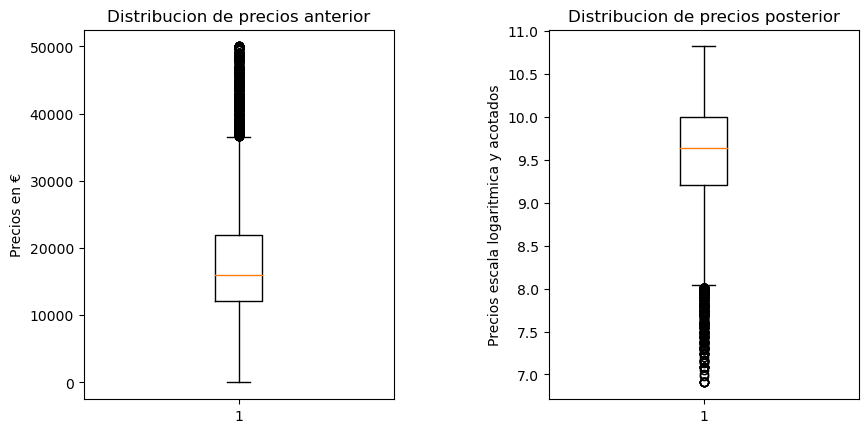

In [40]:
fig, (ax2, ax1) = plt.subplots(1, 2)

z = df_acotado.precio_escalado

ax2.boxplot(df.price)
ax1.boxplot(z)
ax2.set_title('Distribucion de precios anterior')
ax1.set_title('Distribucion de precios posterior')
ax2.set_ylabel('Precios en €')
ax1.set_ylabel('Precios escala logaritmica y acotados')
fig.subplots_adjust(wspace=0.5)
fig.set_figwidth(10)

Podemos ver que tras nuestra acotación y la transformación a escala logarítmica, la distrubución será mas eficiente para nuestro
modelo. 

In [41]:
df_acotado.precio_escalado

0        10.038892
1         9.902987
2         9.830379
3        10.030120
5         9.809177
           ...    
99931     9.809177
99947     9.366489
99948     9.487896
99996     9.136694
99998     8.980927
Name: precio_escalado, Length: 11028, dtype: float64

Además hemos escogido un diagrama de violín con el objetivo de tener otra perspectiva:

Text(0.5, 0, 'Frecuencia')

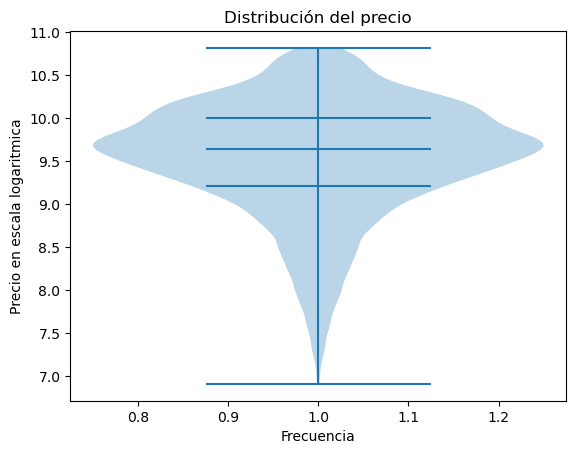

In [42]:
plt.violinplot(df_acotado['precio_escalado'], quantiles = [0.25, 0.5, 0.75])
plt.title('Distribución del precio')
plt.ylabel('Precio en escala logaritmica')
plt.xlabel('Frecuencia')

Podemos apreciar que nuestra distribución recae sobre los caurtiles medios, algo típico de una distribución normal. 

In [43]:
df_acotado.head()

,make,fuel,kms,shift,antiguedad,precio_escalado
0,Opel,0,5.0,1,1,10.038892
1,Opel,0,24847.0,1,1,9.902987
2,Opel,1,41356.0,0,2,9.830379
3,Opel,0,11.0,1,1,10.030120
5,Opel,0,51390.0,1,2,9.809177


#### Label Encoder

In [44]:
le = preprocessing.LabelEncoder()

In [45]:
le.fit(df_acotado['make'])

LabelEncoder()

In [46]:
make_encoded = le.transform(df_acotado['make'])

In [47]:
df_acotado['make'] = make_encoded

In [48]:
df_acotado.shape

(11028, 6)

In [49]:
#save the label encoder to disk pickle
with open('label_encoder.sav', "wb") as f:
    pickle.dump(le, f)

#### Estudio de los posibles clusters en el dataset

In [50]:
np_aux2 = StandardScaler().fit_transform(df_acotado)

hdb = HDBSCAN(min_cluster_size=530).fit(np_aux2)

df_acotado['hdb_labels'] = hdb.labels_

Text(0.5, 0, 'Precio en escala logaritmica')

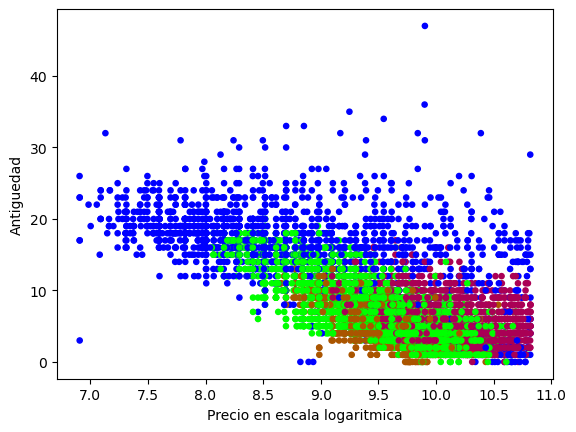

In [51]:
plt.scatter(df_acotado['precio_escalado'],
                df_acotado['antiguedad'],
                c=df_acotado['hdb_labels'],
                cmap='brg',
                s=14)

plt.ylabel('Antiguedad')
plt.xlabel('Precio en escala logaritmica')

Conclusión: 

- Se puede apreciar un grupo de vehiculos con menor varianza, y distinta antiguedad media (verde).
    
- Además podemos ver valores atípicos como un coche con más  de 50 años y con un valor bastante alto que ha reslutado ser un porche 911 (azul).

In [52]:
df_acotado = df_acotado.drop(['hdb_labels'], axis = 1)
df_acotado[df_acotado.antiguedad > 50]

,make,fuel,kms,shift,antiguedad,precio_escalado


# Modelo Machine Learning


In [53]:
#Creamos feature KM/antiguedad

#df_acotado['KM/antiguedad'] = df_acotado['kms'] / df_acotado['antiguedad']


#df_acotado = df_acotado[df_acotado['KM/antiguedad'] != np.inf]

#Split X e Y

X = df_acotado.drop(["precio_escalado"], axis=1)
y = df_acotado.precio_escalado

#Comprobamos nueva columna

#X[X['KM/antiguedad'].isna()]

In [54]:
X = X.fillna(0)

In [55]:
X.isna().sum()

make          0
fuel          0
kms           0
shift         0
antiguedad    0
dtype: int64

### Normalizacion y reducción de la dimensionalidad

In [56]:
from sklearn.preprocessing import Normalizer

In [57]:
#Normalizamos todas las features sin valores inf para no sobredimensionar Kms

normalizador = Normalizer().fit(X)
X_nor = normalizador.transform(X)

In [58]:
pca = PCA(n_components = X_nor.shape[1])
pca.fit(X_nor)

PCA(n_components=5)

In [59]:
#save the normalizator to disk pickle
with open('normalizador.sav', "wb") as f:
    pickle.dump(normalizador, f)

In [60]:
pca.n_components

5

In [61]:
pca.components_[0]

array([ 0.75480904,  0.04159892, -0.65017998,  0.03720497,  0.06644273])

In [62]:
pca.components_[1]

array([-0.41811948,  0.19644652, -0.38725428,  0.07740592,  0.79412046])

In [63]:
ve = [sum(pca.explained_variance_ratio_[:i]) for i in range(X_nor.shape[1])]

Text(0.5, 1.0, 'Varianza explicada por nº features incluidas')

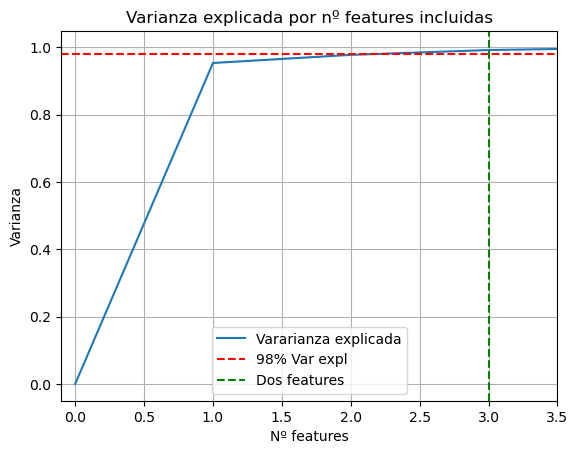

In [64]:
plt.plot(range(X_nor.shape[1]), ve, label='Vararianza explicada')
plt.axhline(y=0.98, color='r', linestyle='--', label='98% Var expl')
plt.axvline(x=3, color='g', linestyle='--', label='Dos features')

plt.ylabel('Varianza')
plt.xlabel('Nº features')
plt.xlim(right=3.5)
plt.xlim(left=-0.1)
plt.grid()
plt.legend()

plt.title('Varianza explicada por nº features incluidas')

En el gráfico podemos apreciar que con tres features se supera el óptimo para llegar a un 98% de varianza explicada

### Entrenamos modelo con y sin PCA

#### Regresion lineal

Sin PCA

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
#Split train y test SIN PCA

X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_nor,y, test_size=0.25)

In [67]:
#Entrenamos modelo regresivo con GridSearch previo 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

parameters = {'fit_intercept': [True, False], 'n_jobs': [1, 2, -1]}

reg = LinearRegression()

GSLRsinPCA = GridSearchCV(reg, parameters)

GSLRsinPCA.fit(X_train_S, y_train_S)

print(GSLRsinPCA.cv_results_)

{'mean_fit_time': array([0.00199614, 0.00259895, 0.00239487, 0.00140023, 0.00159869,
       0.00159945]), 'std_fit_time': array([0.00063946, 0.00049072, 0.00048403, 0.0004894 , 0.00048918,
       0.00048854]), 'mean_score_time': array([0.00099983, 0.0007998 , 0.00080237, 0.00059991, 0.00100174,
       0.00060043]), 'std_score_time': array([0.00063144, 0.0003999 , 0.0004012 , 0.00048982, 0.0006343 ,
       0.00049025]), 'param_fit_intercept': masked_array(data=[True, True, True, False, False, False],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_n_jobs': masked_array(data=[1, 2, -1, 1, 2, -1],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'fit_intercept': True, 'n_jobs': 1}, {'fit_intercept': True, 'n_jobs': 2}, {'fit_intercept': True, 'n_jobs': -1}, {'fit_intercept': False, 'n_jobs': 1}, {'fit_intercept': False, 'n_jobs': 2}, {'fit_inter

La busqueda de hiperparametros señala a los modelos primero, segundo y tercero como mejores, con misma consistencia 
(desviacion tipica de score) y media de score, resultando en la primera posición en el ranking

In [68]:
y_pred_S = GSLRsinPCA.predict(X_test_S)

In [69]:
mae = mean_absolute_error(y_test_S, y_pred_S)
mae

0.5232598726210936

In [70]:
reg_S_mae = mean_absolute_error(y_test_S, y_pred_S)
reg_S_mse = mean_squared_error(y_test_S, y_pred_S)
reg_S_rmse = reg_S_mse**.5

In [71]:
data0 = ['Modelo', 'mae', 'mse','sqmse']

In [72]:
data1 = ['Regresion Lineal sin PCA', reg_S_mae, reg_S_mae, reg_S_rmse] 

In [73]:
print(f'{reg_S_mae=} \n{reg_S_mae=} \n{reg_S_rmse=} ')

reg_S_mae=0.5232598726210936 
reg_S_mae=0.5232598726210936 
reg_S_rmse=0.6785845416104395 


In [74]:
print(f' Regresion Lineal sin PCA {GSLRsinPCA.score=}, {mae=}')

 Regresion Lineal sin PCA GSLRsinPCA.score=<bound method BaseSearchCV.score of GridSearchCV(estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False], 'n_jobs': [1, 2, -1]})>, mae=0.5232598726210936


Con PCA

In [75]:
x_pca = pca.fit_transform(X_nor)

In [76]:
#Split train y test CON PCA

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(x_pca,y, test_size=0.25)

In [77]:
#Entrenamos modelo regresivo con Grid Search y PCA

parameters = {'fit_intercept': [True, False], 'n_jobs': [1, 2, -1]}

reg = LinearRegression()

GSLRconPCA = GridSearchCV(reg, parameters)

GSLRconPCA.fit(X_train_c, y_train_c)

print(GSLRconPCA.cv_results_)


{'mean_fit_time': array([0.00299954, 0.00279808, 0.00159969, 0.00219965, 0.00220056,
       0.00260034]), 'std_fit_time': array([1.90734863e-06, 9.78110121e-04, 4.89610942e-04, 7.48838181e-04,
       4.00567491e-04, 8.01100569e-04]), 'mean_score_time': array([0.00140562, 0.00120068, 0.00100045, 0.00080075, 0.00120077,
       0.00100002]), 'std_score_time': array([4.98036235e-04, 4.00900936e-04, 6.32560542e-04, 4.00376927e-04,
       3.99542267e-04, 3.09613859e-06]), 'param_fit_intercept': masked_array(data=[True, True, True, False, False, False],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_n_jobs': masked_array(data=[1, 2, -1, 1, 2, -1],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'fit_intercept': True, 'n_jobs': 1}, {'fit_intercept': True, 'n_jobs': 2}, {'fit_intercept': True, 'n_jobs': -1}, {'fit_intercept': False, 'n_jobs': 1}, {'

La busqueda de hiperparametros señala a los modelos primero, segundo y tercero como mejores, con misma consistencia 
(desviacion tipica de score) y media de score, resultando en la primera posición en el ranking

In [78]:
y_pred_c = GSLRconPCA.predict(X_test_c)
mae = mean_absolute_error(y_test_c, y_pred_c)
mae

0.5117479554167789

In [79]:
reg_C_mae = mean_absolute_error(y_test_c, y_pred_c)
reg_C_mse = mean_squared_error(y_test_c, y_pred_c)
reg_C_rmse = reg_C_mse**.5

In [80]:
data2 = ['Regresion Lineal con PCA', reg_C_mae, reg_C_mse, reg_C_rmse] 

In [81]:
print(f'{reg_C_mae=} \n{reg_C_mse=} \n{reg_C_rmse=} ')

reg_C_mae=0.5117479554167789 
reg_C_mse=0.45057702381788045 
reg_C_rmse=0.6712503436258938 


#### Random Forest Regressor

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

SIN PCA

In [83]:

parameters = {'n_estimators':[10, 100, 500], 'max_depth':(10, 20, None)}

rfr = RandomForestRegressor()

GSRFsinPCA = GridSearchCV(rfr, parameters)

GSRFsinPCA.fit(X_train_S, y_train_S)


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': (10, 20, None),
                         'n_estimators': [10, 100, 500]})

In [84]:
print(GSRFsinPCA.cv_results_)


{'mean_fit_time': array([ 0.31020737,  2.98500133, 14.83160262,  0.54019771,  5.39779601,
       27.18156238,  0.55960698,  5.58158541, 28.42382183]), 'std_fit_time': array([0.01265246, 0.03920158, 0.08961527, 0.00453327, 0.03304554,
       0.0595314 , 0.00552401, 0.0481639 , 0.33804207]), 'mean_score_time': array([0.00380101, 0.02660041, 0.13358521, 0.00519991, 0.04377279,
       0.21962776, 0.00580134, 0.04680109, 0.23399591]), 'std_score_time': array([0.00039948, 0.00082008, 0.00295233, 0.00040402, 0.00040559,
       0.0047232 , 0.00040086, 0.00038308, 0.00713255]), 'param_max_depth': masked_array(data=[10, 10, 10, 20, 20, 20, None, None, None],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[10, 100, 500, 10, 100, 500, 10, 100, 500],
             mask=[False, False, False, False, False, False, False, False,
                   False],
     

Los resultados del Grid Search indican que el modelo mas eficiente es el tercero (max depth = 10, nº estimators = 100), 
con la primera posicion en el ranking y mayor consistencia (menor desviacion tipica de score)

In [85]:
y_pred_S_rf = GSRFsinPCA.predict(X_test_S)

In [86]:
rf_S_mae = mean_absolute_error(y_test_S, y_pred_S_rf)
rf_S_mse = mean_squared_error(y_test_S, y_pred_S_rf)
rf_S_rmse = rf_S_mse**.5

In [87]:
data3 = ['Random Forest sin PCA', rf_S_mae, rf_S_mse, rf_S_rmse] 

In [88]:
print(f'{rf_S_mae=} \n{rf_S_mse=} \n{rf_S_rmse=} ')

rf_S_mae=0.2714104200062069 
rf_S_mse=0.14456550554056255 
rf_S_rmse=0.3802177080838852 


CON PCA

In [89]:
parameters = {'n_estimators':[10, 100, 500], 'max_depth':(10, 20, None)}

rfr = RandomForestRegressor()

GSRFconPCA = GridSearchCV(rfr, parameters)

GSRFconPCA.fit(X_train_c, y_train_c)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': (10, 20, None),
                         'n_estimators': [10, 100, 500]})

In [90]:
print(GSRFconPCA.cv_results_)


{'mean_fit_time': array([ 0.44899631,  4.49820275, 22.44498968,  0.76859832,  7.80539961,
       39.0284102 ,  0.80159087,  8.03515906, 40.28356647]), 'std_fit_time': array([0.00190343, 0.02628393, 0.08593099, 0.0023326 , 0.05256966,
       0.10410384, 0.00994381, 0.04250611, 0.23339213]), 'mean_score_time': array([0.00400424, 0.02760267, 0.12919908, 0.00500197, 0.04299483,
       0.2104063 , 0.00560665, 0.04440169, 0.21660151]), 'std_score_time': array([6.33325269e-04, 2.22370205e-03, 4.72229218e-03, 9.58430826e-07,
       1.10293867e-03, 4.40861267e-03, 7.97102522e-04, 7.99512984e-04,
       4.79995413e-03]), 'param_max_depth': masked_array(data=[10, 10, 10, 20, 20, 20, None, None, None],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[10, 100, 500, 10, 100, 500, 10, 100, 500],
             mask=[False, False, False, False, False, False, Fal

El modelo mas eficiente es el cuarto, con mayor consistencia (max_depth': 15, 'n_estimators': 100) 


In [91]:
y_pred_C_rf = GSRFconPCA.predict(X_test_c)

In [92]:
rfc2_C_mae = mean_absolute_error(y_test_c, y_pred_C_rf)
rfc2_C_mse = mean_squared_error(y_test_c, y_pred_C_rf)
rfc2_C_rmse = rfc2_C_mse**.5

In [93]:
data4 = ['Random Forest con PCA', rfc2_C_mae, rfc2_C_mse, rfc2_C_rmse] 

In [94]:
print(f'{rfc2_C_mae=} \n{rfc2_C_mse=} \n{rfc2_C_rmse=} ')

rfc2_C_mae=0.2720597196072738 
rfc2_C_mse=0.1528512128277082 
rfc2_C_rmse=0.39096190713125517 


#### XGBOOST

In [95]:
from xgboost import XGBRegressor 

SIN PCA

In [96]:
xgb = XGBRegressor()

parameters = {'learning_rate':[0.2, 0.5, 0.1], 'max_depth':(10, 20, None), 'n_estimators':[10, 100, 500]}

xgb.fit(X_train_S, y_train_S)

GSXGBsinPCA = GridSearchCV(xgb, parameters)

GSXGBsinPCA.fit(X_train_S, y_train_S)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.5, 0.1],
                         'max_depth': (10, 20, None),
                         'n_estimators': [10, 100, 500]})

In [97]:
with open('modelo_final.sav', "wb") as f:
    pickle.dump(GSXGBsinPCA, f)

In [98]:
print(GSXGBsinPCA.cv_results_)

{'mean_fit_time': array([0.04760094, 0.65320039, 3.78660026, 0.06040154, 1.69439945,
       4.07040005, 0.04980259, 0.4997992 , 2.52100139, 0.08400254,
       0.85780067, 3.08360047, 0.15640235, 1.36839986, 1.86060057,
       0.05860167, 0.54160032, 2.59860029, 0.04780154, 0.82699947,
       4.40320039, 0.04960341, 1.71919932, 8.0651999 , 0.04720154,
       0.54479938, 2.79600086]), 'std_fit_time': array([0.00048956, 0.0061115 , 0.34068122, 0.00101905, 0.02518306,
       0.16828869, 0.00040069, 0.00630647, 0.02229824, 0.00126467,
       0.0041649 , 0.05556382, 0.00162352, 0.04089762, 0.05436149,
       0.00224423, 0.00567904, 0.01636555, 0.00097934, 0.00189708,
       0.01845279, 0.00101982, 0.01596777, 0.29154742, 0.00116607,
       0.00247924, 0.04112385]), 'mean_score_time': array([0.00359883, 0.00500007, 0.01300049, 0.00379901, 0.00820127,
       0.01640091, 0.00399809, 0.00520129, 0.0091989 , 0.00419788,
       0.00599952, 0.01080112, 0.00439882, 0.00860043, 0.00879908,
       0.0

In [99]:
y_pred_S_xb = GSXGBsinPCA.predict(X_test_S)

In [100]:
xgbS_mae = mean_absolute_error(y_test_S, y_pred_S_xb)
xgbS_mse = mean_squared_error(y_test_S, y_pred_S_xb)
xgbS_rmse = xgbS_mse**.5


In [101]:
print(f'{xgbS_mae=} \n{xgbS_mse=} \n{xgbS_rmse=} ')

xgbS_mae=0.266886988952141 
xgbS_mse=0.14126263552558183 
xgbS_rmse=0.37584921913658653 


In [102]:
data5 = ['XGBoost sin PCA', xgbS_mae, xgbS_mse, xgbS_rmse] 

Con PCA

In [103]:
xgb = XGBRegressor()

parameters = {'learning_rate':[0.2, 0.5, 0.1], 'max_depth':(10, 20, None)}

xgb.fit(X_train_c, y_train_c)

GSXGBconPCA = GridSearchCV(xgb, parameters)

GSXGBconPCA.fit(X_train_c, y_train_c)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.5, 0.1],
                         'max_depth': (10, 20, None)})

In [104]:
print(GSXGBconPCA.cv_results_)

{'mean_fit_time': array([1.07679939, 2.2155992 , 0.67499919, 1.12239833, 1.75100055,
       0.64300017, 1.02560105, 2.05680132, 0.63099833]), 'std_fit_time': array([0.01098119, 0.02173161, 0.01392728, 0.02271949, 0.06319159,
       0.00328631, 0.00320047, 0.01724385, 0.00485862]), 'mean_score_time': array([0.00680113, 0.00980182, 0.00620089, 0.00720091, 0.00859942,
       0.00540042, 0.00659871, 0.00939999, 0.00560064]), 'std_score_time': array([0.00039911, 0.00040124, 0.00039931, 0.00040045, 0.00048932,
       0.00049008, 0.00048969, 0.00049127, 0.00049043]), 'param_learning_rate': masked_array(data=[0.2, 0.2, 0.2, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[10, 20, None, 10, 20, None, 10, 20, None],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fil

In [105]:
y_pred_C_xb = GSXGBconPCA.predict(X_test_c)

In [106]:
xgb_C_mae = mean_absolute_error(y_test_c, y_pred_C_xb)
xgb_C_mse = mean_squared_error(y_test_c, y_pred_C_xb)
xgb_C_rmse = xgb_C_mse**.5

In [107]:
data6 = ['XGBoost con PCA',  xgb_C_mae, xgb_C_mse, xgb_C_rmse] 

In [108]:
print(f'{xgb_C_mae=} \n{xgb_C_mse=} \n{xgb_C_rmse=} ')

xgb_C_mae=0.2804808471155282 
xgb_C_mse=0.15954001324839698 
xgb_C_rmse=0.3994246027079416 


In [109]:
columns = data0

resultados = pd.DataFrame( [data1,  
                            data2, 
                            data3,  
                            data4,  
                            data5,
                            data6
                           ],  columns=columns)

### Tabla Reporte Resultado Modelos

In [110]:
resultados 

,Modelo,mae,mse,sqmse
0,Regresion Lineal sin PCA,0.523260,0.523260,0.678585
1,Regresion Lineal con PCA,0.511748,0.450577,0.671250
2,Random Forest sin PCA,0.271410,0.144566,0.380218
3,Random Forest con PCA,0.272060,0.152851,0.390962
4,XGBoost sin PCA,0.266887,0.141263,0.375849
5,XGBoost con PCA,0.280481,0.159540,0.399425


Tras analizar las métricas de los resultados de los distintos modelos realizados con y sin PCA, llegamos a la conclusión
de que el mejor modelo en base a nuestros datos es el de XGBoost sin PCA.

In [111]:
resultados.to_csv('metricas_modelos.csv')

In [112]:
resultados.describe()

,mae,mse,sqmse
count,6.000000,6.000000,6.000000
mean,0.354308,0.262009,0.482715
std,0.126540,0.175840,0.149126
min,0.266887,0.141263,0.375849
25%,0.271573,0.146637,0.382904
50%,0.276270,0.156196,0.395193
75%,0.453931,0.377818,0.603294
max,0.523260,0.523260,0.678585
